In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import PFSMG as pfsmg
import functions as func
import pickle

In [2]:
SEED_arr = [112233455, 666, 889099, 558866, 559966, 99998866, 99888866, 9966668, 99677808, 7542229,  \
            11234455, 6600451, 8852099, 110036, 277066, 277066, 900186, 9820816, 908253, 1089532]
num_data = range(1000, 6001, 500)
data_idx = 10

## Two objectives: Equal FNR vs Loss


In [57]:
prob = func.Fairness_LogRe_EO_smoothed_v2('data/CAMPAS_race.txt', 'CAMPAS_race', 1, 112233455, 5278, 'all') #Fairness_LogRe_EO_smoothed
# prob = func.Fairness_LogRe_EFPR_smoothed('data/german_clean.txt', 'german_gender', 1, 6666, 1000, 'all')
run = pfsmg.Main_SMG(prob)

## key parameters
run.point_per_iteration = 3 
run.num_steps_per_point = 3
run.stepsize = 4.0 
run.step_scheme = 3 
run.batch1_init = 80 
run.batch1_factor = 1.005 
run.batch1_max = 1 
run.batch2_init = 80
run.batch2_factor = 1.005 
run.batch2_max = 1.0/2
run.discount_iter_interval = 100
run.alpha = 1.0/3

## other parameters
run.num_starting_pts = 5
run.percent_explore = 0.4 
run.f1_explore_interval = 12
run.f2_explore_interval = 42 
run.f1_explore_pt_per_iter = 2
run.f2_explore_pt_per_iter = 1
run.max_hole_explore_pt_per_iter = 2*run.point_per_iteration

run.num_max_hole_points = 8 
run.f1_num_steps_per_point = 2*run.num_steps_per_point 
run.f2_num_steps_per_point = run.num_steps_per_point 
run.max_hole_num_steps_per_point = run.num_steps_per_point 
run.max_hole_only = False
run.dense_threshold = 1.0/1200

#All data size:  5278
Sensitive feature index:  1
Sum of positive ones:  2103.0


In [8]:
x = np.random.uniform(prob.lb, prob.ub, [1, prob.n])

In [17]:
print prob.g2(x, alpha = -20.0)

[-5.31069989e-03 -5.31069989e-03 -0.00000000e+00 -1.14630759e-20
 -5.31069989e-03 -5.51864553e-20  1.59202037e-03 -0.00000000e+00]


In [11]:
print prob.g2(x)

[-0.00531067 -0.00531067 -0.         -0.         -0.00531067 -0.
  0.00159201 -0.        ]


In [58]:
f1_arrays7, f2_arrays7, point_arrays7, total_time = run.main_SMG()

time:  0.119910001755
#Pts:  7  #Iter:  3
time:  0.130287885666
#Pts:  2  #Iter:  6
time:  0.0488300323486
#Pts:  8  #Iter:  9
time:  0.135782957077
#Pts:  9  #Iter:  12
time:  0.168632030487
#Pts:  2  #Iter:  15
time:  0.0437569618225
#Pts:  5  #Iter:  18
time:  0.0946731567383
#Pts:  8  #Iter:  21
time:  0.117261171341
#Pts:  7  #Iter:  24
time:  0.139214992523
#Pts:  10  #Iter:  27
time:  0.149137973785
#Pts:  18  #Iter:  30
time:  0.228785037994
#Pts:  29  #Iter:  33
time:  0.398005962372
#Pts:  40  #Iter:  36
time:  0.653703927994
#Pts:  38  #Iter:  39
time:  0.425416946411
#Pts:  42  #Iter:  42
time:  0.464911937714
#Pts:  45  #Iter:  45
time:  0.438533067703
#Pts:  39  #Iter:  48
time:  0.614670991898
#Pts:  34  #Iter:  51
time:  0.358335018158
#Pts:  45  #Iter:  54
time:  0.413326978683
#Pts:  51  #Iter:  57
time:  0.480548858643
#Pts:  56  #Iter:  60
time:  0.858187913895
#Pts:  69  #Iter:  63
time:  0.657734870911
#Pts:  88  #Iter:  66
time:  0.834027051926
#Pts:  111  #Iter:

time:  11.4316799641
#Pts:  1219  #Iter:  549
time:  11.4309289455
#Pts:  1201  #Iter:  552
time:  11.2662830353
#Pts:  1225  #Iter:  555
time:  11.5781340599
#Pts:  1233  #Iter:  558
time:  11.7225489616
#Pts:  1238  #Iter:  561
time:  11.6819419861
#Pts:  1225  #Iter:  564
time:  11.6836080551
#Pts:  1226  #Iter:  567
time:  11.6508669853
#Pts:  1217  #Iter:  570
time:  11.5586001873
#Pts:  1230  #Iter:  573
time:  11.6585028172
#Pts:  1213  #Iter:  576
time:  11.3442521095
#Pts:  1236  #Iter:  579
time:  11.6254680157
#Pts:  1219  #Iter:  582
time:  11.5450479984
#Pts:  1208  #Iter:  585
time:  11.5627570152
#Pts:  1239  #Iter:  588
time:  12.2773489952
#Pts:  1222  #Iter:  591
time:  11.818821907
#Pts:  1225  #Iter:  594
time:  11.974337101
#Pts:  1223  #Iter:  597
time:  12.0302219391
#Pts:  1201  #Iter:  600
time:  11.7563660145
#Pts:  1258  #Iter:  603
time:  12.3572399616
#Pts:  1233  #Iter:  606
time:  11.9317960739
#Pts:  1286  #Iter:  609
time:  12.8088672161
#Pts:  1301  #I

In [59]:
## dump data into log file
## f1 is DI and f2 is EO
logfile = "pickle/COMPAS/EFNR_dataAll.pickle"
pickle.dump([prob.data_name, total_time, run.num_grad_eval_f1, \
             run.num_grad_eval_f2, run.num_iter, f1_arrays7, \
             f2_arrays7, point_arrays7], open(logfile,"wb"))

In [65]:
logfile = "pickle/COMPAS/EFPR_dataAll.pickle"
data, total_time_smg, num_grad_eval_f1, \
      num_grad_eval_f2, run.num_iter, f1_arrays7, \
      f2_arrays7, point_arrays7 \
= pickle.load(open(logfile,"rb"))

In [61]:
def remove_pts(list_f1, list_f2, list_pts, num):
    list_f1_idx = np.argsort(list_f1)[:-num]
    return list_f1[list_f1_idx], list_f2[list_f1_idx], list_pts[list_f1_idx]

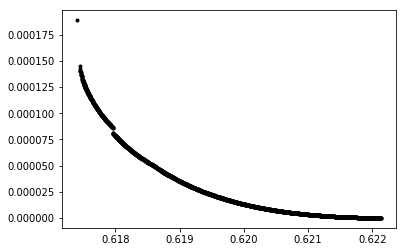

In [66]:
plt.plot(f1_arrays7, f2_arrays7, 'k.')
plt.show()

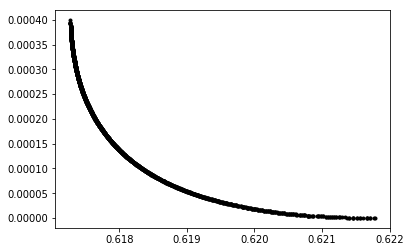

In [62]:
## if necessary, remove extreme points that are far away from Pareto front
f1_arrays7, f2_arrays7, point_arrays7 = remove_pts(f1_arrays7, f2_arrays7, point_arrays7, 1)
plt.plot(f1_arrays7, f2_arrays7, 'k.')
plt.show()

In [67]:
## Compute loss, accuracy, and CV score for points on Pareto front 
M = min(1500, len(f1_arrays7)) 
CV_FPR, CV_FNR, disparate_impact, percentage, pvalue, total_accuracy, training_accuracy, training_FPR, training_FNR, \
training_loss, training_obj1, training_obj2 \
= prob.compute_accuracy(f1_arrays7, f2_arrays7, point_arrays7, M)


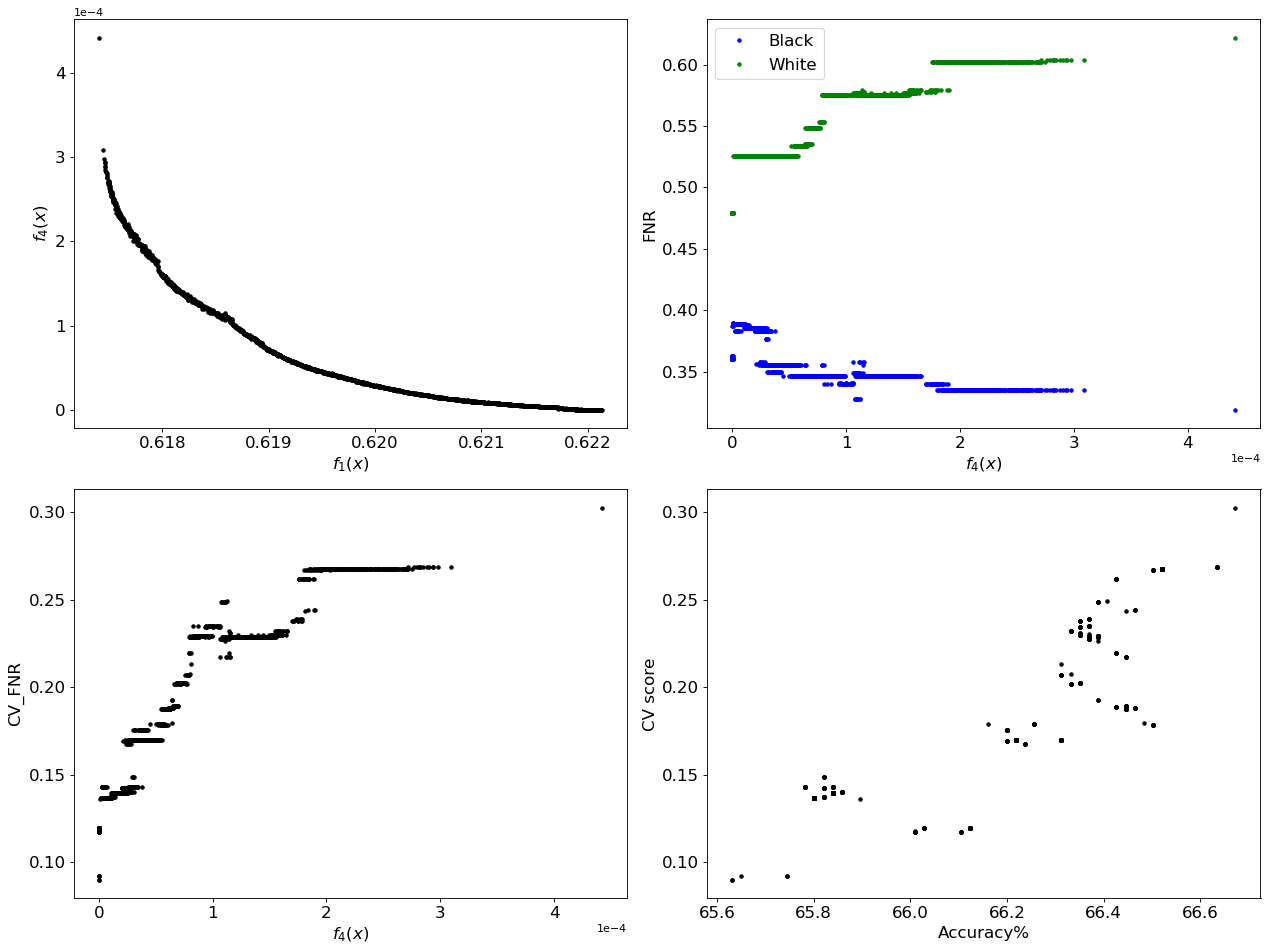

In [68]:
fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 2, 1)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.plot(training_loss, training_obj2, 'k.', lw=2)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_xlabel('$f_1(x)$', fontsize=15)
ax1.set_ylabel('$f_4(x)$', fontsize=15)

ax2 = plt.subplot(2, 2, 2)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.plot(training_obj2, training_FNR[:, 0], 'b.', lw=2, label = 'Black')
ax2.plot(training_obj2, training_FNR[:, 1], 'g.', lw=2, label = 'White')
ax2.set_xlabel('$f_4(x)$', fontsize = 15)
ax2.set_ylabel('FNR', fontsize = 15)
ax2.legend(fontsize = 15)

ax3= plt.subplot(2, 2, 3)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)
ax3.plot(training_obj2, CV_FNR, 'k.', lw=2)
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax3.set_xlabel('$f_4(x)$', fontsize = 15)
ax3.set_ylabel('CV_FNR', fontsize = 15)

ax4 = plt.subplot(2, 2, 4)
ax4.xaxis.set_tick_params(labelsize=15)
ax4.yaxis.set_tick_params(labelsize=15)
ax4.plot(total_accuracy*100, CV_FNR, 'k.', lw=2)
ax4.set_xlabel('Accuracy%', fontsize = 15)
ax4.set_ylabel('CV score', fontsize = 15)

plt.tight_layout()
plt.show()


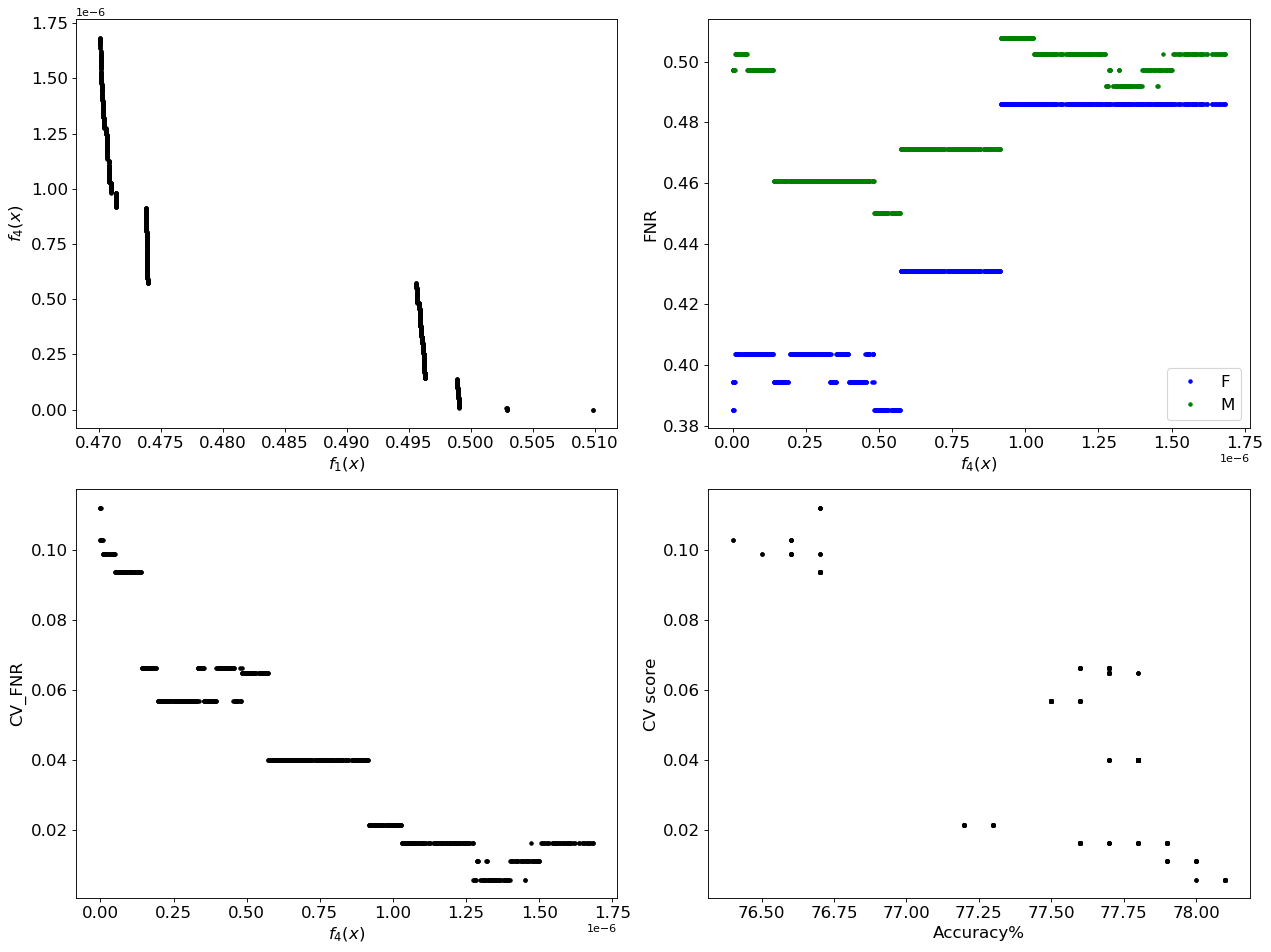

In [50]:
fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 2, 1)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.plot(training_loss, training_obj2, 'k.', lw=2)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_xlabel('$f_1(x)$', fontsize=15)
ax1.set_ylabel('$f_4(x)$', fontsize=15)

ax2 = plt.subplot(2, 2, 2)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.plot(training_obj2, training_FPR[:, 0], 'b.', lw=2, label = 'F')
ax2.plot(training_obj2, training_FPR[:, 1], 'g.', lw=2, label = 'M')
ax2.set_xlabel('$f_4(x)$', fontsize = 15)
ax2.set_ylabel('FNR', fontsize = 15)
ax2.legend(fontsize = 15)

ax3= plt.subplot(2, 2, 3)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)
ax3.plot(training_obj2, CV_FPR, 'k.', lw=2)
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax3.set_xlabel('$f_4(x)$', fontsize = 15)
ax3.set_ylabel('CV_FNR', fontsize = 15)

ax4 = plt.subplot(2, 2, 4)
ax4.xaxis.set_tick_params(labelsize=15)
ax4.yaxis.set_tick_params(labelsize=15)
ax4.plot(total_accuracy*100, CV_FPR, 'k.', lw=2)
ax4.set_xlabel('Accuracy%', fontsize = 15)
ax4.set_ylabel('CV score', fontsize = 15)

plt.tight_layout()
plt.show()


## Two objectives: disparate impact vs Equal FNR

In [13]:
prob = func.Fairness_LogRe_DIEO('data/CAMPAS_race.txt', 'CAMPAS_race', 1, 112233455, 5278, 'all')
run = pfsmg.Main_SMG_m2(prob)

## key parameters
run.point_per_iteration = 3 
run.num_steps_per_point = 3
run.stepsize = 2.0 #4.0 
run.step_scheme = 3 
run.batch1_init = 80 
run.batch1_factor = 1.005 
run.batch1_max = 1.0/2 
run.batch2_init = 80
run.batch2_factor = 1.005 
run.batch2_max = 1.0/2
run.discount_iter_interval = 100
run.alpha = 1.0/3

## other parameters
run.num_starting_pts = 5
run.percent_explore = 0.4 
run.f1_explore_interval = 12
run.f2_explore_interval = 42 
run.f1_explore_pt_per_iter = 2
run.f2_explore_pt_per_iter = 1
run.max_hole_explore_pt_per_iter = 2*run.point_per_iteration

run.num_max_hole_points = 8 
run.f1_num_steps_per_point = 2*run.num_steps_per_point 
run.f2_num_steps_per_point = run.num_steps_per_point 
run.max_hole_num_steps_per_point = run.num_steps_per_point 
run.max_hole_only = False
run.dense_threshold = 1.0/1200

#All data size:  5278
Sensitive feature index:  1
Sum of positive ones:  2103.0


In [14]:
f1_arrays7, f2_arrays7, point_arrays7, total_time_smg = run.main_SMG()

time:  0.130766868591
#Pts:  2  #Iter:  3
time:  0.0556659698486
#Pts:  6  #Iter:  6
time:  0.110688924789
#Pts:  9  #Iter:  9
time:  0.16618514061
#Pts:  19  #Iter:  12
time:  0.473633050919
#Pts:  18  #Iter:  15
time:  0.323585033417
#Pts:  20  #Iter:  18
time:  0.37654209137
#Pts:  16  #Iter:  21
time:  0.3097178936
#Pts:  10  #Iter:  24
time:  0.274572134018
#Pts:  15  #Iter:  27
time:  0.291256904602
#Pts:  8  #Iter:  30
time:  0.161765813828
#Pts:  9  #Iter:  33
time:  0.192564964294
#Pts:  9  #Iter:  36
time:  0.238159894943
#Pts:  7  #Iter:  39
time:  0.150332212448
#Pts:  6  #Iter:  42
time:  0.150769948959
#Pts:  7  #Iter:  45
time:  0.137284040451
#Pts:  6  #Iter:  48
time:  0.154870986938
#Pts:  6  #Iter:  51
time:  0.126582860947
#Pts:  7  #Iter:  54
time:  0.139235019684
#Pts:  6  #Iter:  57
time:  0.120620012283
#Pts:  6  #Iter:  60
time:  0.153072118759
#Pts:  6  #Iter:  63
time:  0.1212849617
#Pts:  7  #Iter:  66
time:  0.134107112885
#Pts:  4  #Iter:  69
time:  0.0847

time:  0.140958070755
#Pts:  4  #Iter:  567
time:  0.127328872681
#Pts:  4  #Iter:  570
time:  0.111448049545
#Pts:  4  #Iter:  573
time:  0.116858005524
#Pts:  4  #Iter:  576
time:  0.131716012955
#Pts:  4  #Iter:  579
time:  0.127441883087
#Pts:  4  #Iter:  582
time:  0.120239973068
#Pts:  4  #Iter:  585
time:  0.120225906372
#Pts:  4  #Iter:  588
time:  0.125055074692
#Pts:  4  #Iter:  591
time:  0.123974084854
#Pts:  4  #Iter:  594
time:  0.125541210175
#Pts:  4  #Iter:  597
time:  0.123556137085
#Pts:  4  #Iter:  600
time:  0.126935005188
#Pts:  4  #Iter:  603
time:  0.129248142242
#Pts:  4  #Iter:  606
time:  0.136052131653
#Pts:  4  #Iter:  609
time:  0.126238822937
#Pts:  4  #Iter:  612
time:  0.131946086884
#Pts:  5  #Iter:  615
time:  0.158165931702
#Pts:  6  #Iter:  618
time:  0.176635026932
#Pts:  7  #Iter:  621
time:  0.194363117218
#Pts:  7  #Iter:  624
time:  0.212337017059
#Pts:  7  #Iter:  627
time:  0.215392112732
#Pts:  7  #Iter:  630
time:  0.21564412117
#Pts:  7  #

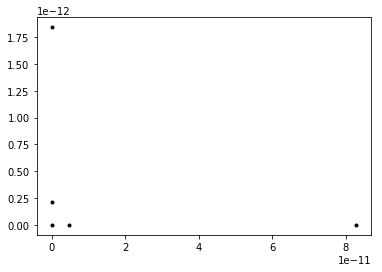

In [16]:
plt.plot(f1_arrays7, f2_arrays7, 'k.')
plt.show()

In [15]:
## dump data into log file
## f1 is DI and f2 is EO
logfile = "pickle/EO_vs_DI/EODIOnly_output2.pickle"
pickle.dump([prob.data_name, total_time, run.num_grad_eval_f1, \
             run.num_grad_eval_f2, run.num_iter, f1_arrays7, \
             f2_arrays7, point_arrays7], open(logfile,"wb"))

## Two objectives: disparate impact vs loss

In [2]:
prob = func.Fairness_LogRe_DI_binary('data/CAMPAS_race.txt', 'CAMPAS_race', 1, 112233455, 5278, 'all')
run = pfsmg.Main_SMG(prob)

## key parameters
run.point_per_iteration = 3 
run.num_steps_per_point = 3
run.stepsize = 2.0 #4.0 
run.step_scheme = 3 
run.batch1_init = 80 
run.batch1_factor = 1.005 
run.batch1_max = 1.0/2 
run.batch2_init = 80
run.batch2_factor = 1.005 
run.batch2_max = 1.0/2
run.discount_iter_interval = 100
run.alpha = 1.0/3

## other parameters
run.num_starting_pts = 5
run.percent_explore = 0.4 
run.f1_explore_interval = 12
run.f2_explore_interval = 42 
run.f1_explore_pt_per_iter = 2
run.f2_explore_pt_per_iter = 1
run.max_hole_explore_pt_per_iter = 2*run.point_per_iteration

run.num_max_hole_points = 8 
run.f1_num_steps_per_point = 2*run.num_steps_per_point 
run.f2_num_steps_per_point = run.num_steps_per_point 
run.max_hole_num_steps_per_point = run.num_steps_per_point 
run.max_hole_only = False
run.dense_threshold = 1.0/1200

# Training data size:  5278
split 1
idx [2 3 4 5 6 7 8 9]
sum of sensitive 2103.0


In [3]:
f1_arrays7, f2_arrays7, point_arrays7, total_time_smg = run.main_SMG()

time:  0.11153793335
#Pts:  5  #Iter:  3
time:  0.0680940151215
#Pts:  2  #Iter:  6
time:  0.0364680290222
#Pts:  9  #Iter:  9
time:  0.120453834534
#Pts:  11  #Iter:  12
time:  0.193476915359
#Pts:  13  #Iter:  15
time:  0.171235084534
#Pts:  19  #Iter:  18
time:  0.245562076569
#Pts:  17  #Iter:  21
time:  0.232491016388
#Pts:  19  #Iter:  24
time:  0.354391098022
#Pts:  20  #Iter:  27
time:  0.24020409584
#Pts:  22  #Iter:  30
time:  0.260288000107
#Pts:  26  #Iter:  33
time:  0.26874089241
#Pts:  26  #Iter:  36
time:  0.394499063492
#Pts:  36  #Iter:  39
time:  0.326369047165
#Pts:  45  #Iter:  42
time:  0.452498197556
#Pts:  51  #Iter:  45
time:  0.436226844788
#Pts:  53  #Iter:  48
time:  0.74152302742
#Pts:  52  #Iter:  51
time:  0.438392877579
#Pts:  53  #Iter:  54
time:  0.440505027771
#Pts:  58  #Iter:  57
time:  0.491715908051
#Pts:  71  #Iter:  60


KeyboardInterrupt: 

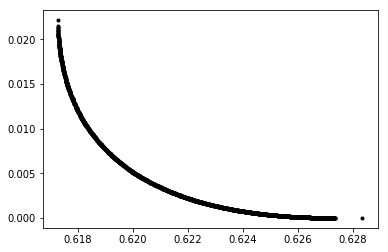

In [4]:
plt.plot(f1_arrays7, f2_arrays7, 'k.')
plt.show()

In [6]:
## f1 is loss and f2 is disparate impact
logfile = "pickle/COMPAS/DI_vs_loss_output1.pickle"
pickle.dump([prob.data_name, total_time_smg, run.num_grad_eval_f1, \
             run.num_grad_eval_f2, run.num_iter, f1_arrays7, \
             f2_arrays7, point_arrays7], open(logfile,"wb"))

In [7]:
M = min(1500, len(f1_arrays7))
CV_Score, percentage, pvalue, total_accuracy, training_accuracy, training_FPR, training_FNR, \
training_loss, training_obj1, training_obj2 \
= prob.compute_accuracy(f1_arrays7, f2_arrays7, point_arrays7, M)


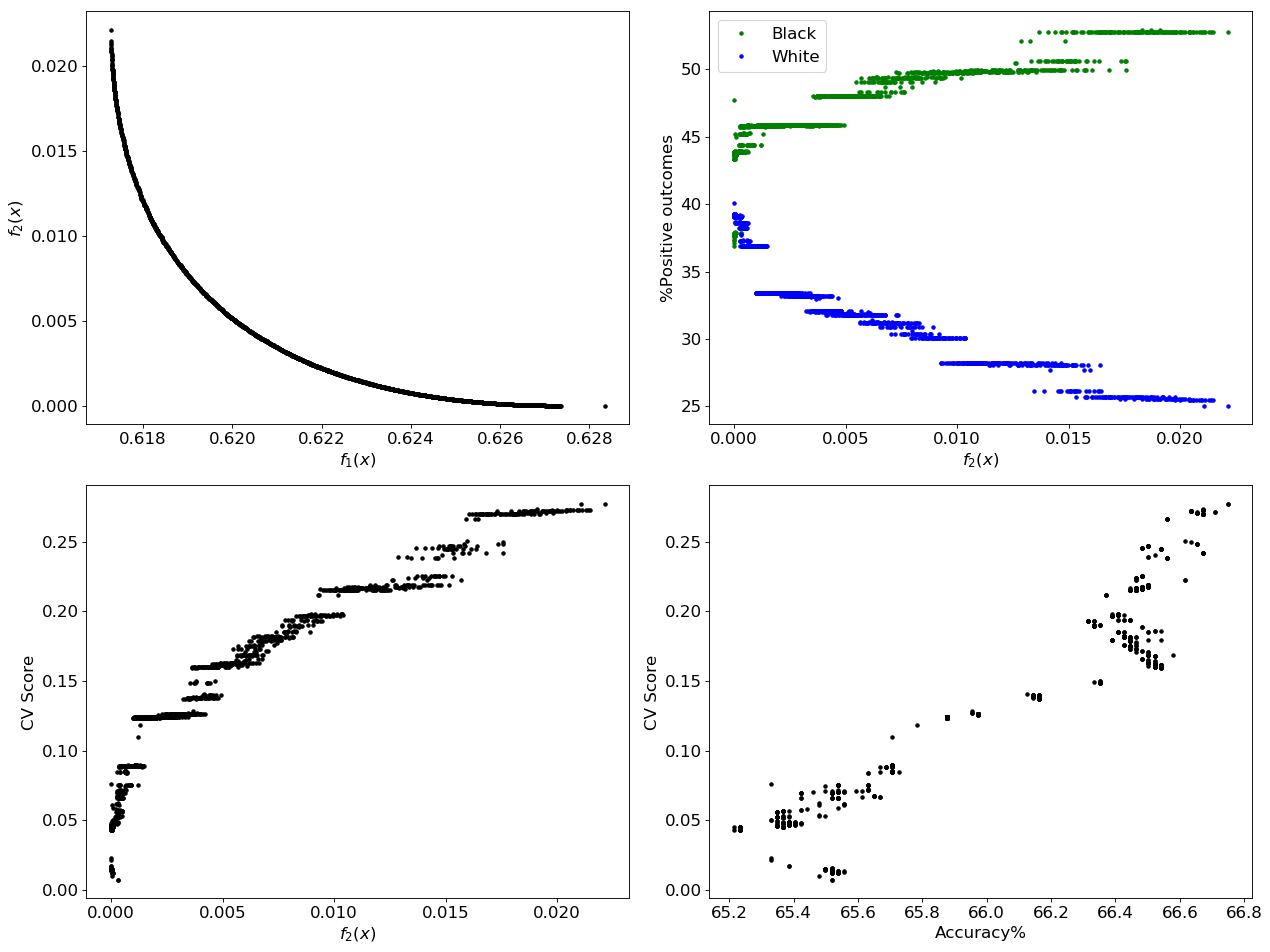

In [8]:
fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 2, 1)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.plot(training_loss, training_obj2, 'k.', lw=2)
ax1.set_xlabel('$f_1(x)$', fontsize = 15)
ax1.set_ylabel('$f_2(x)$', fontsize = 15)

ax2 = plt.subplot(2, 2, 2)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.plot(training_obj2, percentage[:, 0]*100.0, 'g.', lw=2, label = 'Black')
ax2.plot(training_obj2, percentage[:, 1]*100.0, 'b.', lw=2, label = 'White')
ax2.set_xlabel('$f_2(x)$', fontsize = 15)
ax2.set_ylabel('%Positive outcomes', fontsize = 15)
ax2.legend(fontsize=15)

ax3= plt.subplot(2, 2, 3)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)
ax3.plot(training_obj2, CV_Score, 'k.', lw=2)
ax3.set_xlabel('$f_2(x)$', fontsize=15)
ax3.set_ylabel('CV Score', fontsize=15)

ax4 = plt.subplot(2, 2, 4)
ax4.xaxis.set_tick_params(labelsize=15)
ax4.yaxis.set_tick_params(labelsize=15)
ax4.plot(total_accuracy*100.0, CV_Score, 'k.', lw=2)
ax4.set_xlabel('Accuracy%', fontsize=15)
ax4.set_ylabel('CV Score', fontsize=15)

plt.tight_layout()
plt.show()


## Three objectives: disparate impact vs Equal FNR vs loss

In [3]:
prob = func.Fairness_LogRe_DIEO_m3('data/CAMPAS_race.txt', 'CAMPAS_race', 1, 112233455, 5278, 'all')
run = pfsmg.Main_SMG_m3(prob)

run.max_len_pareto_front = 3000
## key parameters
run.point_per_iteration = 3 
run.num_steps_per_point = 3
run.stepsize = 2.0 #4.0 
run.step_scheme = 3 
run.batch1_init = 80 
run.batch1_factor = 1.005 
run.batch1_max = 1.0/2 
run.batch2_init = 80
run.batch2_factor = 1.005 
run.batch2_max = 1.0/2
run.batch3_init = 80
run.batch3_factor = 1.005 
run.batch3_max = 1.0/2
run.discount_iter_interval = 100
run.alpha = 1.0/3

## other parameters
run.num_starting_pts = 5
run.percent_explore = 0.4 
run.f1_explore_interval = 12
run.f2_explore_interval = 42 
run.f1_explore_pt_per_iter = 2
run.f2_explore_pt_per_iter = 1
run.max_hole_explore_pt_per_iter = 2*run.point_per_iteration

run.num_max_hole_points = 8 
run.f1_num_steps_per_point = 2*run.num_steps_per_point 
run.f2_num_steps_per_point = run.num_steps_per_point 
run.max_hole_num_steps_per_point = run.num_steps_per_point 
run.max_hole_only = False
run.dense_threshold = 1.0/1400

#All data size:  5278
Sensitive feature index:  1
Sum of positive ones:  2103.0


In [5]:
f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7, total_time_smg = run.main_SMG()

time:  0.17657494545
#Pts:  5  #Iter:  3
time:  0.138503074646
#Pts:  9  #Iter:  6
time:  0.209178924561
#Pts:  17  #Iter:  9
time:  0.324604988098
#Pts:  31  #Iter:  12
time:  0.805947065353
#Pts:  24  #Iter:  15
time:  0.403278112411
#Pts:  41  #Iter:  18
time:  0.620567798615
#Pts:  45  #Iter:  21
time:  0.716366052628
#Pts:  64  #Iter:  24
time:  1.48990511894
#Pts:  79  #Iter:  27
time:  1.02162098885
#Pts:  137  #Iter:  30
time:  1.62176895142
#Pts:  167  #Iter:  33
time:  1.87959384918
#Pts:  235  #Iter:  36
time:  4.89618802071
#Pts:  271  #Iter:  39
time:  3.03188514709
#Pts:  315  #Iter:  42
time:  4.63328289986
#Pts:  349  #Iter:  45
time:  4.35416507721
#Pts:  367  #Iter:  48
time:  8.89842581749
#Pts:  303  #Iter:  51
time:  3.8609919548
#Pts:  362  #Iter:  54
time:  4.34450912476
#Pts:  397  #Iter:  57
time:  4.19087100029
#Pts:  394  #Iter:  60
time:  8.26458716393
#Pts:  508  #Iter:  63
time:  5.28972792625
#Pts:  625  #Iter:  66
time:  6.65418601036
#Pts:  698  #Iter: 

time:  28.2369890213
#Pts:  2163  #Iter:  546
time:  27.8310880661
#Pts:  2167  #Iter:  549
time:  28.0908398628
#Pts:  2166  #Iter:  552
time:  27.9420340061
#Pts:  2168  #Iter:  555
time:  28.1641480923
#Pts:  2169  #Iter:  558
time:  29.4432339668
#Pts:  2168  #Iter:  561
time:  28.2911660671
#Pts:  2161  #Iter:  564
time:  28.3787190914
#Pts:  2159  #Iter:  567
time:  28.1419389248
#Pts:  2136  #Iter:  570
time:  27.5349562168
#Pts:  2132  #Iter:  573
time:  27.7458341122
#Pts:  2103  #Iter:  576
time:  27.3587520123
#Pts:  2092  #Iter:  579
time:  27.1156439781
#Pts:  2111  #Iter:  582
time:  27.8079891205
#Pts:  2140  #Iter:  585
time:  27.7491669655
#Pts:  2145  #Iter:  588
time:  27.8667910099
#Pts:  2140  #Iter:  591
time:  27.9075629711
#Pts:  2145  #Iter:  594
time:  28.9693579674
#Pts:  2151  #Iter:  597
time:  28.2896060944
#Pts:  2148  #Iter:  600
time:  28.5277371407
#Pts:  2182  #Iter:  603
time:  29.3155081272
#Pts:  2183  #Iter:  606
time:  28.9019620419
#Pts:  2187  

In [4]:
## dump data into log file
logfile = "pickle/COMPAS/three_obj/EODI_m3_pf3000_gap1400.pickle"
pickle.dump([prob.data_name, total_time_smg, run.num_grad_eval_f1, \
             run.num_grad_eval_f2, run.num_grad_eval_f3, run.num_iter, f1_arrays7, \
             f2_arrays7, f3_arrays7, point_arrays7], open(logfile,"wb"))

In [4]:
logfile = "pickle/COMPAS/three_obj/EODI_m3_pf3000_gap1400.pickle"
data, total_time_smg, num_grad_eval_f1, num_grad_eval_f2, num_grad_eval_f3, num_iter7, f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7 \
= pickle.load(open(logfile,"rb"))

In [5]:
plt.rc('font', **{'size':'20'})

3140


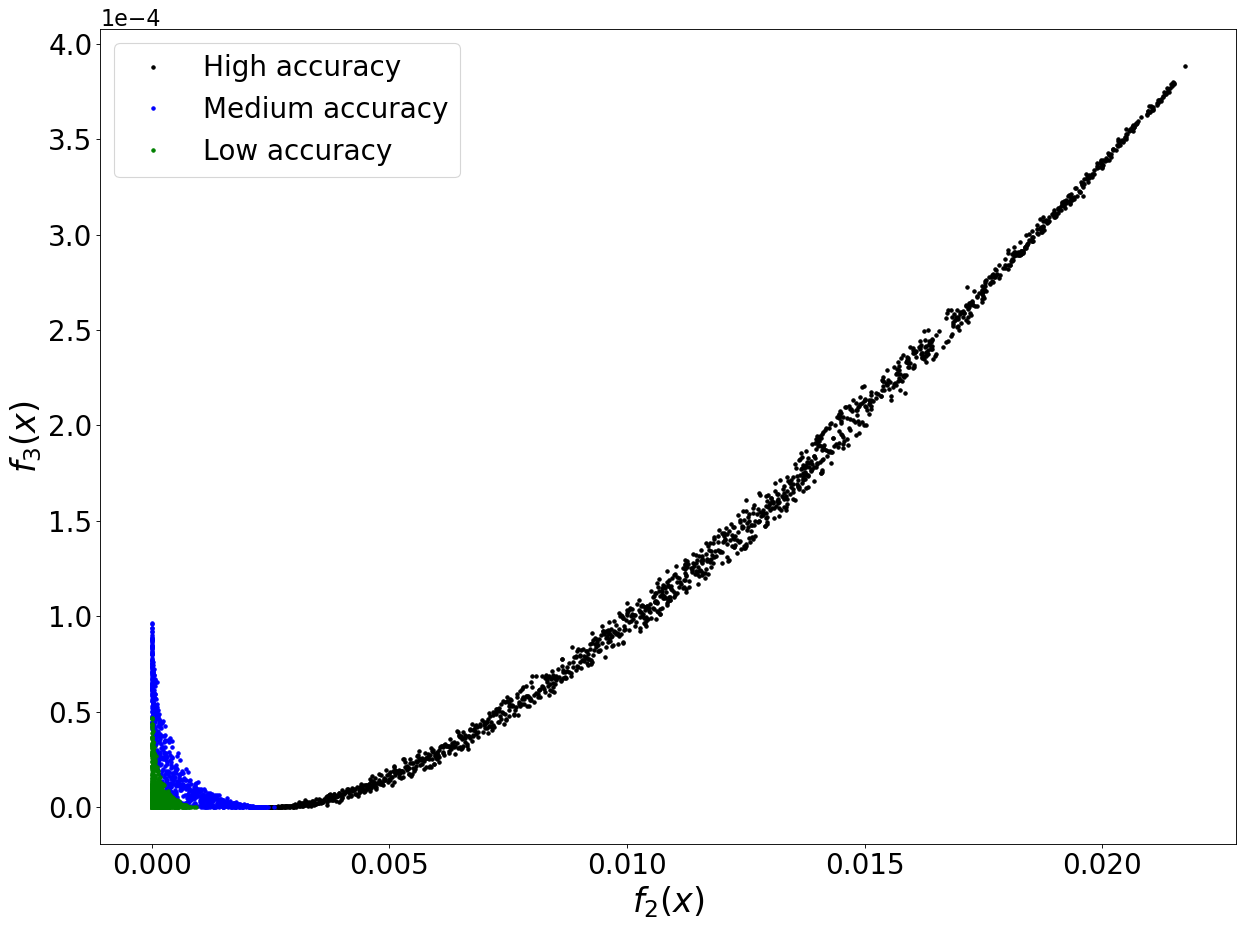

In [6]:
print len(f1_arrays7)
import matplotlib.cm as cm
colors = cm.rainbow(f1_arrays7/np.max(f1_arrays7))
idx_red = np.where(f1_arrays7 < (np.max(f1_arrays7) - np.min(f1_arrays7))*1.5/10 + np.min(f1_arrays7))
idx_blue = np.where((f1_arrays7 >= (np.max(f1_arrays7) - np.min(f1_arrays7))*1.5/10 + np.min(f1_arrays7)) \
                    & (f1_arrays7 < (np.max(f1_arrays7) - np.min(f1_arrays7))*4/10 + np.min(f1_arrays7)))
idx_green = np.where(f1_arrays7 >= (np.max(f1_arrays7) - np.min(f1_arrays7))*4/10 + np.min(f1_arrays7))


fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
# ax.plot(training_loss, training_obj2, 'k.', lw=2)
ax.plot(f3_arrays7[idx_red], f2_arrays7[idx_red],  'k.', label = 'High accuracy') #color=colors   higher accuracy
ax.plot(f3_arrays7[idx_blue], f2_arrays7[idx_blue],  'b.', label = 'Medium accuracy') #color=colors  middle accuracy
ax.plot(f3_arrays7[idx_green], f2_arrays7[idx_green],  'g.', label = 'Low accuracy') #color=colors lowest accuracy

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_xlabel('$f_2(x)$', fontsize=30)
ax.set_ylabel('$f_3(x)$', fontsize=30)
ax.legend(fontsize = 25)

plt.tight_layout()
plt.show()

figure_path = "figs/COMPAS_threeObj_EODI_2.pdf"
fig.savefig(figure_path, bbox_inches='tight')

In [44]:
print len(idx_red[0]), len(idx_blue[0]), len(idx_green[0])

1368 866 906


In [26]:
print colors

[[1.         0.13510525 0.067708   1.        ]
 [1.         0.13510525 0.067708   1.        ]
 [1.         0.13510525 0.067708   1.        ]
 ...
 [1.         0.11065268 0.05541147 1.        ]
 [1.         0.09840028 0.04925994 1.        ]
 [1.         0.09840028 0.04925994 1.        ]]


In [22]:
def remove_pts(list_f1, list_f2, list_f3, list_pts, num):
    list_f1_idx = np.argsort(list_f1)[:-num]
    return list_f1[list_f1_idx], list_f2[list_f1_idx], list_f3[list_f1_idx], list_pts[list_f1_idx]

In [25]:
f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7 = remove_pts(f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7, 2)

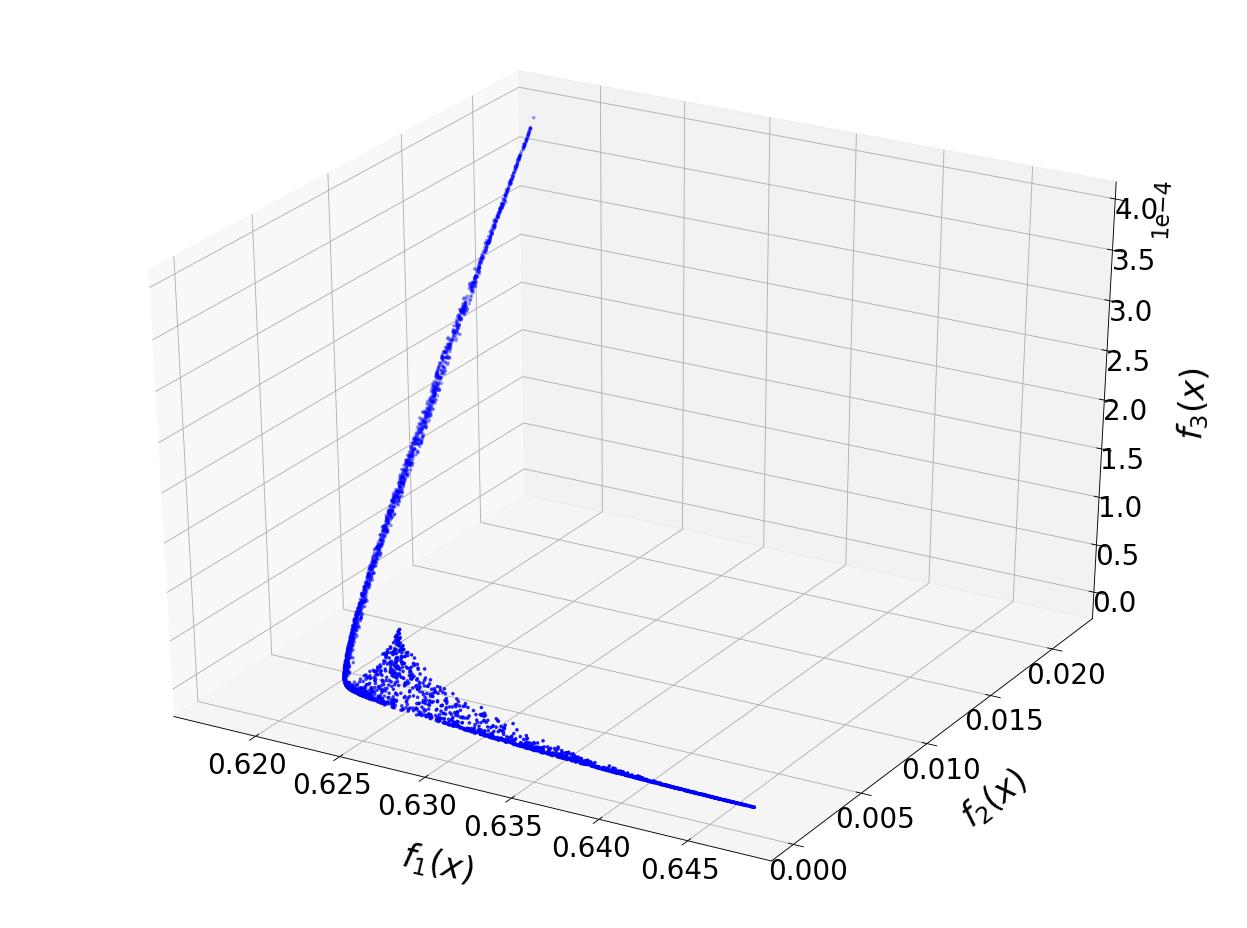

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection='3d')
# ax.scatter(f1_arrays7[idx_red], f2_arrays7[idx_red], f3_arrays7[idx_red], c='r', marker='.')
# ax.scatter(f1_arrays7[idx_blue], f2_arrays7[idx_blue], f3_arrays7[idx_blue], c='b', marker='.')
# ax.scatter(f1_arrays7[idx_green], f2_arrays7[idx_green], f3_arrays7[idx_green], c='g', marker='.')

# ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax.zaxis.set_tick_params(labelsize=25)
plt.ticklabel_format(style='sci', axis='z', scilimits=(0,0), useMathText=True)

ax.set_xlabel('\n$f_1(x)$', fontsize = 30, linespacing=3)
ax.set_ylabel('\n$f_2(x)$', fontsize = 30, linespacing=3)
ax.set_zlabel('\n$f_3(x)$', fontsize = 30, linespacing=3)
# ax.zaxis.set_major_locator(LinearLocator(10))

ax.scatter(f1_arrays7, f3_arrays7, f2_arrays7, c='b', marker='.')
plt.tight_layout()
plt.show()

figure_path = "figs/COMPAS_threeObj_EODI.pdf"
fig.savefig(figure_path, bbox_inches='tight')

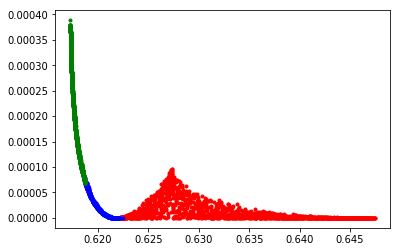

In [51]:

idx_red = np.where(f3_arrays7 < (np.max(f3_arrays7) - np.min(f3_arrays7))*1.0/10 + np.min(f3_arrays7))
idx_blue = np.where((f3_arrays7 >= (np.max(f3_arrays7) - np.min(f3_arrays7))*1.0/10 + np.min(f3_arrays7)) \
                    & (f3_arrays7 < (np.max(f3_arrays7) - np.min(f3_arrays7))*4.0/10 + np.min(f3_arrays7)))
idx_green = np.where(f3_arrays7 >= (np.max(f3_arrays7) - np.min(f3_arrays7))*4.0/10 + np.min(f3_arrays7))

plt.plot(f1_arrays7[idx_red], f2_arrays7[idx_red],  'r.') #color=colors   low DI
plt.plot(f1_arrays7[idx_blue], f2_arrays7[idx_blue],  'b.') #color=colors  middle DI
plt.plot(f1_arrays7[idx_green], f2_arrays7[idx_green],  'g.') #color=colors high DI

# plt.xlim(min(f2_arrays7), max(f2_arrays7))
# plt.ylim(min(f3_arrays7), max(f3_arrays7))
plt.show()

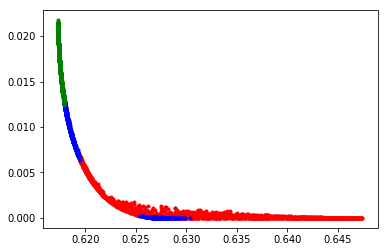

In [53]:

idx_red = np.where(f2_arrays7 < (np.max(f2_arrays7) - np.min(f2_arrays7))*1.0/10 + np.min(f2_arrays7))
idx_blue = np.where((f2_arrays7 >= (np.max(f2_arrays7) - np.min(f2_arrays7))*1.0/10 + np.min(f2_arrays7)) \
                    & (f2_arrays7 < (np.max(f2_arrays7) - np.min(f2_arrays7))*4.0/10 + np.min(f2_arrays7)))
idx_green = np.where(f2_arrays7 >= (np.max(f2_arrays7) - np.min(f2_arrays7))*4.0/10 + np.min(f2_arrays7))

plt.plot(f1_arrays7[idx_red], f3_arrays7[idx_red],  'r.') #color=colors   low FNR
plt.plot(f1_arrays7[idx_blue], f3_arrays7[idx_blue],  'b.') #color=colors  middle FNR
plt.plot(f1_arrays7[idx_green], f3_arrays7[idx_green],  'g.') #color=colors high FNR

# plt.xlim(min(f2_arrays7), max(f2_arrays7))
# plt.ylim(min(f3_arrays7), max(f3_arrays7))
plt.show()

In [ ]:
# f1:loss, f2: Equal FNR, f3: disparate impact

In [5]:
SEED_arr = [112233455, 666, 889099, 558866, 559966, 99998866, 99888866, 9966668, 99677808, 7542229,  \
            11234455, 6600451, 8852099, 110036, 277066, 277066, 900186, 9820816, 908253, 1089532]
num_data = range(1000, 6001, 500)
data_idx = 6

In [42]:
prob = func.Fairness_LogRe_DIEO_m3('data/Adult_income_gender_reduced.txt', 'Adult_income_gender', 1, SEED_arr[data_idx], num_data[data_idx], 'train')
run = pfsmg.Main_SMG_m3(prob)

run.max_len_pareto_front = 3000

## key parameters
run.point_per_iteration = 2 
run.num_steps_per_point = 3 
run.stepsize = 2.1 
run.step_scheme = 3
run.alpha = 1.0/3 
run.discount_iter_interval = 80 
run.batch1_init = 80 
run.batch1_factor = 1.005 
run.batch1_max = 1 
run.batch2_init = 80  
run.batch2_factor = 1.005 
run.batch2_max = 1.0/2  

## other parameters
run.num_starting_pts = 5
run.percent_explore = 0.4 
run.f1_explore_interval = 15 
run.f2_explore_interval = 1000 

run.f1_explore_pt_per_iter = 2 
run.f2_explore_pt_per_iter = 1 
run.f1_num_steps_per_point = 3*run.num_steps_per_point 
run.f2_num_steps_per_point = 2*run.num_steps_per_point 

run.num_max_hole_points = 5 
run.max_hole_explore_pt_per_iter = 2*run.point_per_iteration 
run.max_hole_num_steps_per_point = run.num_steps_per_point 
run.max_hole_only = False 
run.dense_threshold = 1.0/1400

#Training data size:  6000
Sensitive feature index:  1
Sum of positive ones:  4063.0


In [62]:
x = np.random.uniform(prob.lb, prob.ub, [1, prob.n])
print prob.g2(x).shape

(52,)


In [43]:
f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7, total_time_smg = run.main_SMG()

time:  0.325505018234
#Pts:  19  #Iter:  3
time:  0.481788158417
#Pts:  51  #Iter:  6
time:  0.99317407608
#Pts:  75  #Iter:  9
time:  1.35031604767
#Pts:  142  #Iter:  12
time:  2.90004181862
#Pts:  244  #Iter:  15
time:  9.57201480865
#Pts:  409  #Iter:  18
time:  5.98610711098
#Pts:  652  #Iter:  21
time:  9.7406039238
#Pts:  850  #Iter:  24
time:  16.4456710815
#Pts:  803  #Iter:  27
time:  11.8335840702
#Pts:  968  #Iter:  30
time:  34.8597710133
#Pts:  1119  #Iter:  33
time:  16.4881358147
#Pts:  1328  #Iter:  36
time:  26.6302468777
#Pts:  1042  #Iter:  39
time:  15.2632098198
#Pts:  1189  #Iter:  42
time:  17.6139848232
#Pts:  1374  #Iter:  45
time:  49.8050611019
#Pts:  1401  #Iter:  48
time:  27.9785280228
#Pts:  1122  #Iter:  51
time:  16.7379980087
#Pts:  1227  #Iter:  54
time:  18.4720990658
#Pts:  1412  #Iter:  57
time:  20.2610421181
#Pts:  1593  #Iter:  60
time:  71.7260110378
#Pts:  1180  #Iter:  63
time:  17.3508219719
#Pts:  1317  #Iter:  66
time:  19.0014059544
#Pts

In [48]:
## dump data into log file
logfile = "pickle/COMPAS/three_obj/Adult_EODI_m3_pf3000_gap1400.pickle"
pickle.dump([prob.data_name, total_time_smg, run.num_grad_eval_f1, \
             run.num_grad_eval_f2, run.num_grad_eval_f3, run.num_iter, f1_arrays7, \
             f2_arrays7, f3_arrays7, point_arrays7], open(logfile,"wb"))

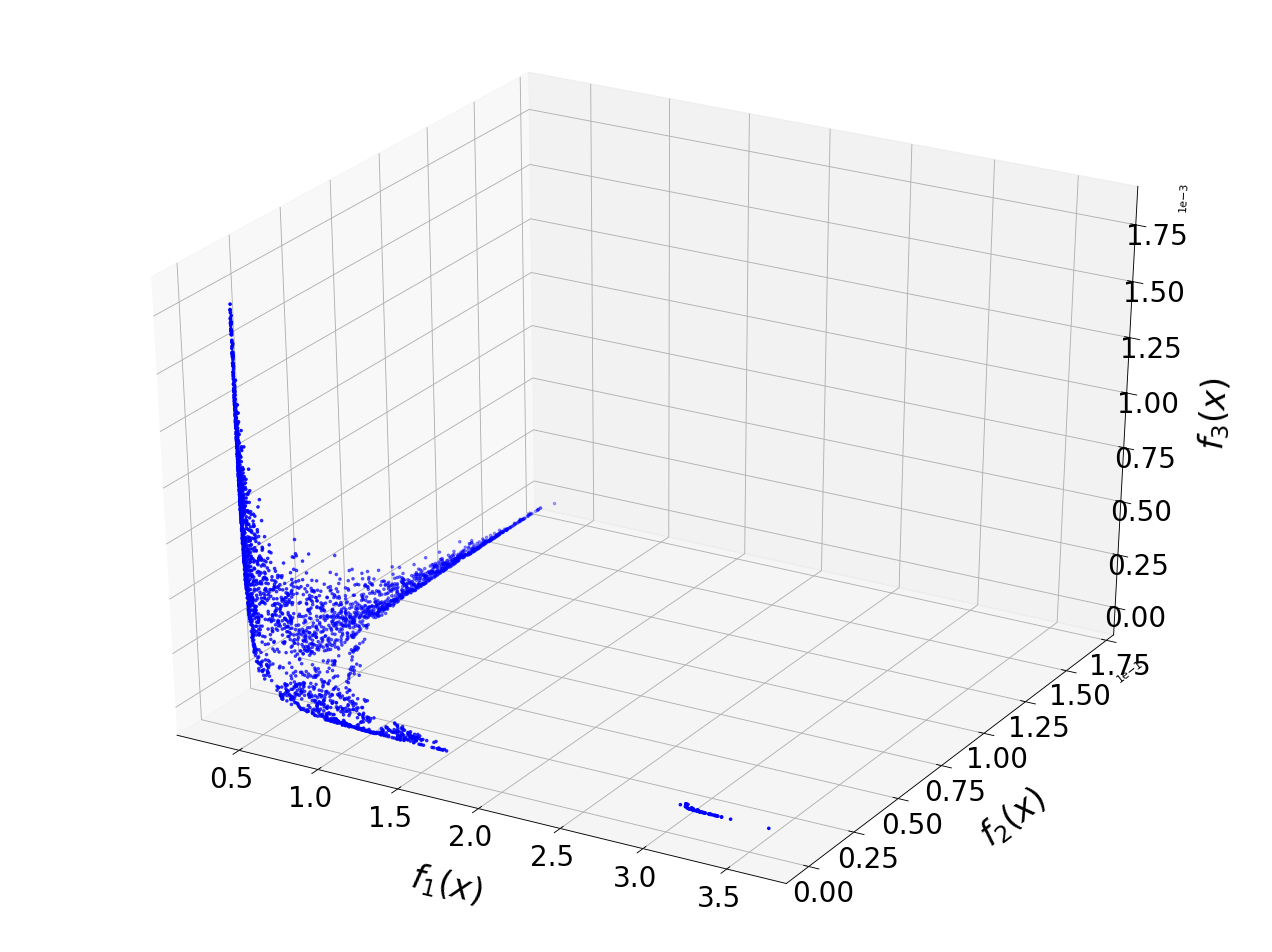

In [45]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection='3d')
# ax.scatter(f1_arrays7[idx_red], f2_arrays7[idx_red], f3_arrays7[idx_red], c='r', marker='.')
# ax.scatter(f1_arrays7[idx_blue], f2_arrays7[idx_blue], f3_arrays7[idx_blue], c='b', marker='.')
# ax.scatter(f1_arrays7[idx_green], f2_arrays7[idx_green], f3_arrays7[idx_green], c='g', marker='.')

# ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax.zaxis.set_tick_params(labelsize=25)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.ticklabel_format(style='sci', axis='z', scilimits=(0,0), useMathText=True)

ax.set_xlabel('\n$f_1(x)$', fontsize = 30, linespacing=3)
ax.set_ylabel('\n$f_2(x)$', fontsize = 30, linespacing=3)
ax.set_zlabel('\n$f_3(x)$', fontsize = 30, linespacing=3)
# ax.zaxis.set_major_locator(LinearLocator(10))

ax.scatter(f1_arrays7, f3_arrays7, f2_arrays7, c='b', marker='.')
plt.tight_layout()
plt.show()

# figure_path = "figs/COMPAS_threeObj_EODI.pdf"
# fig.savefig(figure_path, bbox_inches='tight')

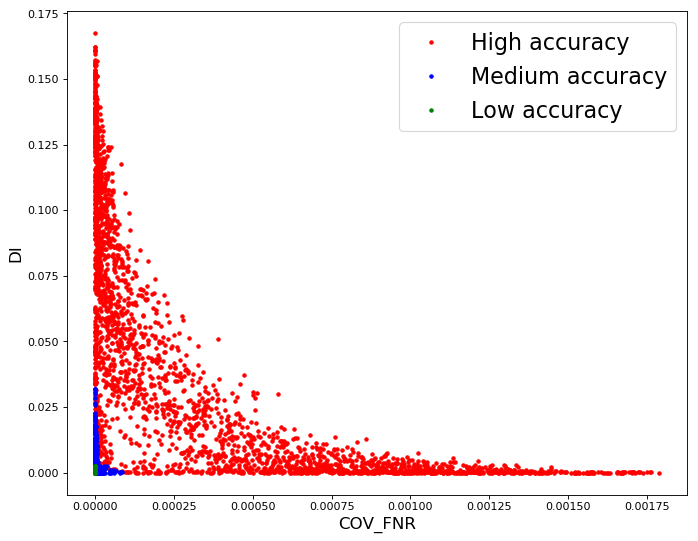

In [46]:
idx_red = np.where(f1_arrays7 < (np.max(f1_arrays7) - np.min(f1_arrays7))*1.0/10 + np.min(f1_arrays7))
idx_blue = np.where((f1_arrays7 >= (np.max(f1_arrays7) - np.min(f1_arrays7))*1.0/10 + np.min(f1_arrays7)) \
                    & (f1_arrays7 < (np.max(f1_arrays7) - np.min(f1_arrays7))*4.0/10 + np.min(f1_arrays7)))
idx_green = np.where(f1_arrays7 >= (np.max(f1_arrays7) - np.min(f1_arrays7))*4.0/10 + np.min(f1_arrays7))

fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax3 = plt.subplot(1, 1, 1)
ax3.plot(f2_arrays7[idx_red], f3_arrays7[idx_red],  'r.', label = "High accuracy") #color=colors   low loss
ax3.plot(f2_arrays7[idx_blue], f3_arrays7[idx_blue],  'b.', label = "Medium accuracy") #color=colors  middle loss
ax3.plot(f2_arrays7[idx_green], f3_arrays7[idx_green],  'g.', label = "Low accuracy") #color=colors high loss
ax3.legend(fontsize = 20)

# plt.xlim(min(f2_arrays7), max(f2_arrays7))
# plt.ylim(min(f3_arrays7), max(f3_arrays7))
ax3.set_xlabel('COV_FNR', fontsize=15)
ax3.set_ylabel('DI', fontsize=15)
plt.show()
# figure_path = "figs/Adult/Adult_threeObj_FNRFPR.png"
# fig.savefig(figure_path, bbox_inches='tight')

In [48]:
## pick a number of points from Pareto front and compute accuracy, TPR, FPR, D.I., etc. 
M = max(1500, len(f1_arrays7)) 
CV_FPR, CV_FNR, CV_Score, percentage, pvalue, total_accuracy, training_accuracy, training_FPR, training_FNR, \
training_loss, training_obj1, training_obj2, training_obj3 \
= prob.compute_accuracy(f1_arrays7, f2_arrays7, point_arrays7, M)


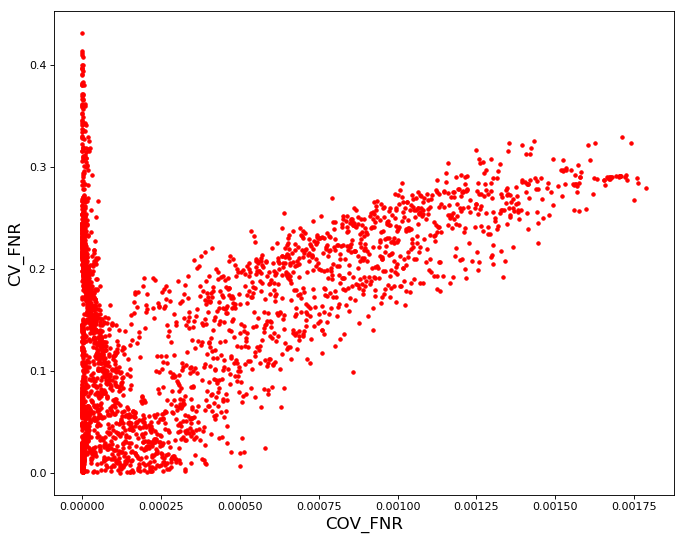

In [52]:
# fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
# ax3 = plt.subplot(1, 1, 1)
# ax3.plot(training_obj1, training_FNR[:, 0],  'r.', label = "Group 1") #color=colors   low loss
# ax3.plot(training_obj1, training_FNR[:, 1],  'b.', label = "Group 2") #color=colors  middle loss
# ax3.legend(fontsize = 20)

# fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
# ax3 = plt.subplot(1, 1, 1)
# ax3.plot(training_obj1, training_FPR[:, 0],  'r.', label = "Group 1") #color=colors   low loss
# ax3.plot(training_obj1, training_FPR[:, 1],  'b.', label = "Group 2") #color=colors  middle loss
# ax3.legend(fontsize = 20)

# plt.xlim(min(f2_arrays7), max(f2_arrays7))
# plt.ylim(min(f3_arrays7), max(f3_arrays7))
# ax3.set_xlabel('CV_FNR', fontsize=15)
# ax3.set_ylabel('CV_FPR', fontsize=15)
# figure_path = "figs/Adult/Adult_threeObj_FNRFPR.png"
# fig.savefig(figure_path, bbox_inches='tight')


fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax3 = plt.subplot(1, 1, 1)

ax3.plot(training_obj2, CV_FNR,  'r.') #color=colors   low loss
ax3.set_xlabel('COV_FNR', fontsize=15)
ax3.set_ylabel('CV_FNR', fontsize=15)

# ax3.plot(training_obj3, CV_FPR,  'b.') #color=colors  middle loss
# ax3.set_xlabel('COV_FPR', fontsize=15)
# ax3.set_ylabel('CV_FPR', fontsize=15)

plt.show()

## Three objectives (Race): Acc vs FNR vs FPR

In [27]:
SEED_arr = [112233455, 666, 889099, 558866, 559966, 99998866, 99888866, 9966668, 99677808, 7542229,  \
            11234455, 6600451, 8852099, 110036, 277066, 277066, 900186, 9820816, 908253, 1089532]
num_data = range(1000, 6001, 500)
data_idx = 10

In [28]:
# prob = func.Fairness_Acc_eFNR_eFPR('data/CAMPAS_race.txt', 'CAMPAS_race', 1, 112233455, 5278, 'all')
prob = func.Fairness_Acc_eFNR_eFPR('data/Adult_income_gender_reduced.txt', 'Adult_income_gender', 1, SEED_arr[data_idx], num_data[data_idx], 'train')
run = pfsmg.Main_SMG_m3(prob)

run.max_len_pareto_front = 2500

## key parameters
run.point_per_iteration = 3 
run.num_steps_per_point = 3
run.stepsize = 4.0 
run.step_scheme = 3 
run.discount_iter_interval = 100
run.alpha = 1.0/3
run.batch1_init = 80 # 50 
run.batch1_factor = 1.005
run.batch1_max = 1
run.batch2_init = 80 
run.batch2_factor = 1.005
run.batch2_max = 1.0/2 
run.batch3_init = 80 
run.batch3_factor = 1.005
run.batch3_max = 1.0/2 

## other parameters
run.num_starting_pts = 5 #20
run.percent_explore = 0.4
run.f1_explore_interval = 10 
run.f2_explore_interval = 40 
run.f3_explore_interval = 40

run.f1_explore_pt_per_iter = 2 
run.f2_explore_pt_per_iter = 1 
run.f3_explore_pt_per_iter = 1 

run.f1_num_steps_per_point = 2*run.num_steps_per_point 
run.f2_num_steps_per_point = run.num_steps_per_point
run.f3_num_steps_per_point = run.num_steps_per_point

run.num_max_hole_points = 8
run.max_hole_explore_pt_per_iter = 2*run.point_per_iteration
run.max_hole_num_steps_per_point = run.num_steps_per_point
run.max_hole_only = False
run.dense_threshold = 1.0/1400 # 0 indicates 1.0/(self.num_iter/2 + 1000)

#Training data size:  6000
Sensitive feature index:  1
Sum of positive ones:  4063.0


In [29]:
# f1_arrays7, f2_arrays7, point_arrays7, total_time = run.main_SMG()
f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7, total_time_smg = run.main_SMG()

time:  0.364124059677
#Pts:  6  #Iter:  3
time:  0.299428939819
#Pts:  12  #Iter:  6
time:  0.545612096786
#Pts:  37  #Iter:  9
time:  1.33466911316
#Pts:  67  #Iter:  12
time:  2.09826898575
#Pts:  77  #Iter:  15
time:  2.51773190498
#Pts:  158  #Iter:  18
time:  4.01427912712
#Pts:  174  #Iter:  21
time:  4.06737208366
#Pts:  297  #Iter:  24
time:  6.69477581978
#Pts:  434  #Iter:  27
time:  10.2214028835
#Pts:  544  #Iter:  30
time:  21.6113898754
#Pts:  418  #Iter:  33
time:  9.53199410439
#Pts:  461  #Iter:  36
time:  10.6698069572
#Pts:  540  #Iter:  39
time:  15.4376881123
#Pts:  655  #Iter:  42
time:  18.8626959324
#Pts:  692  #Iter:  45
time:  18.2659242153
#Pts:  745  #Iter:  48
time:  21.2605018616
#Pts:  810  #Iter:  51
time:  17.7518680096
#Pts:  763  #Iter:  54
time:  17.2159729004
#Pts:  787  #Iter:  57
time:  17.480396986
#Pts:  688  #Iter:  60
time:  26.5604379177
#Pts:  530  #Iter:  63
time:  11.7389609814
#Pts:  631  #Iter:  66
time:  13.7842290401
#Pts:  679  #Iter:

time:  70.4442920685
#Pts:  2257  #Iter:  546
time:  68.5036039352
#Pts:  2251  #Iter:  549
time:  69.1824550629
#Pts:  2318  #Iter:  552
time:  71.0433189869
#Pts:  2400  #Iter:  555
time:  74.2433440685
#Pts:  2331  #Iter:  558
time:  71.8444080353
#Pts:  2361  #Iter:  561
time:  73.752145052
#Pts:  2380  #Iter:  564
time:  74.9886620045
#Pts:  2353  #Iter:  567
time:  74.7499518394
#Pts:  2401  #Iter:  570
time:  75.8773190975
#Pts:  2425  #Iter:  573
time:  78.7388980389
#Pts:  2405  #Iter:  576
time:  76.1108648777
#Pts:  2454  #Iter:  579
time:  80.0533239841
#Pts:  2415  #Iter:  582
time:  79.8152830601
#Pts:  2393  #Iter:  585
time:  77.2769069672
#Pts:  2279  #Iter:  588
time:  73.8316850662
#Pts:  2238  #Iter:  591
time:  72.9885327816
#Pts:  2301  #Iter:  594
time:  75.5793049335
#Pts:  2369  #Iter:  597
time:  78.7565350533
#Pts:  2346  #Iter:  600
time:  78.2814240456
#Pts:  2376  #Iter:  603
time:  80.1390941143
#Pts:  2429  #Iter:  606
time:  82.7186989784
#Pts:  2426  #

In [30]:
def remove_pts(list_f1, list_f2, list_f3, list_pts, num):
    list_f1_idx = np.argsort(list_f1)[:-num]
    return list_f1[list_f1_idx], list_f2[list_f1_idx], list_f3[list_f1_idx],list_pts[list_f1_idx]

In [19]:
f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7 = remove_pts(f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7, 1)

In [52]:
## dump data into log file
logfile = "pickle/COMPAS/three_obj/Compas_FNR&FPR_pf2500_gap1400_dataAll.pickle"
pickle.dump([prob.data_name, total_time_smg, run.num_grad_eval_f1, \
             run.num_grad_eval_f2, run.num_grad_eval_f3, run.num_iter, f1_arrays7, \
             f2_arrays7, f3_arrays7, point_arrays7], open(logfile,"wb"))

In [44]:
logfile = "pickle/COMPAS/three_obj/Adult_FNR&FPR_pf3000_gap1400.pickle"
data, total_time_smg, num_grad_eval_f1, num_grad_eval_f2, num_grad_eval_f3, num_iter7, f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7 \
= pickle.load(open(logfile,"rb"))

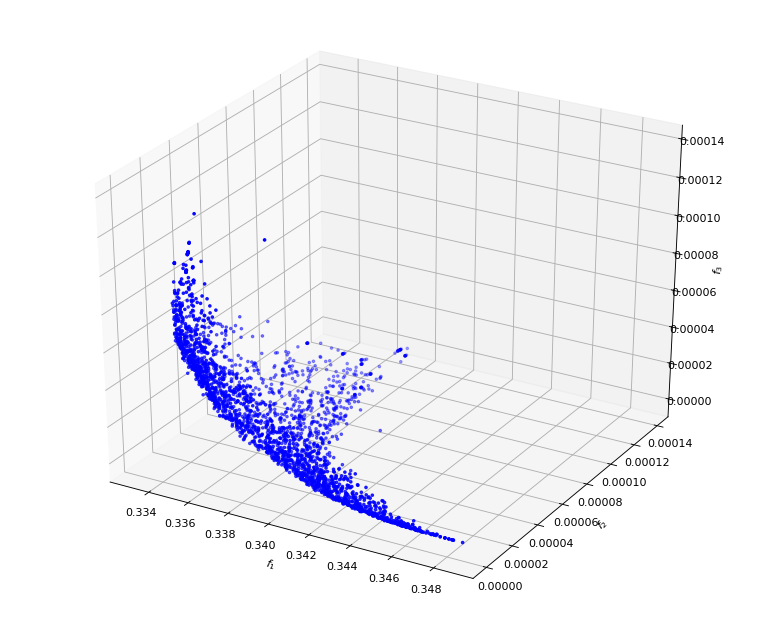

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(f1_arrays7, f2_arrays7, f3_arrays7, c='b', marker='.')

ax.set_xlabel('$f_1$')
ax.set_ylabel('$f_2$')
ax.set_zlabel('$f_3$')

plt.show()

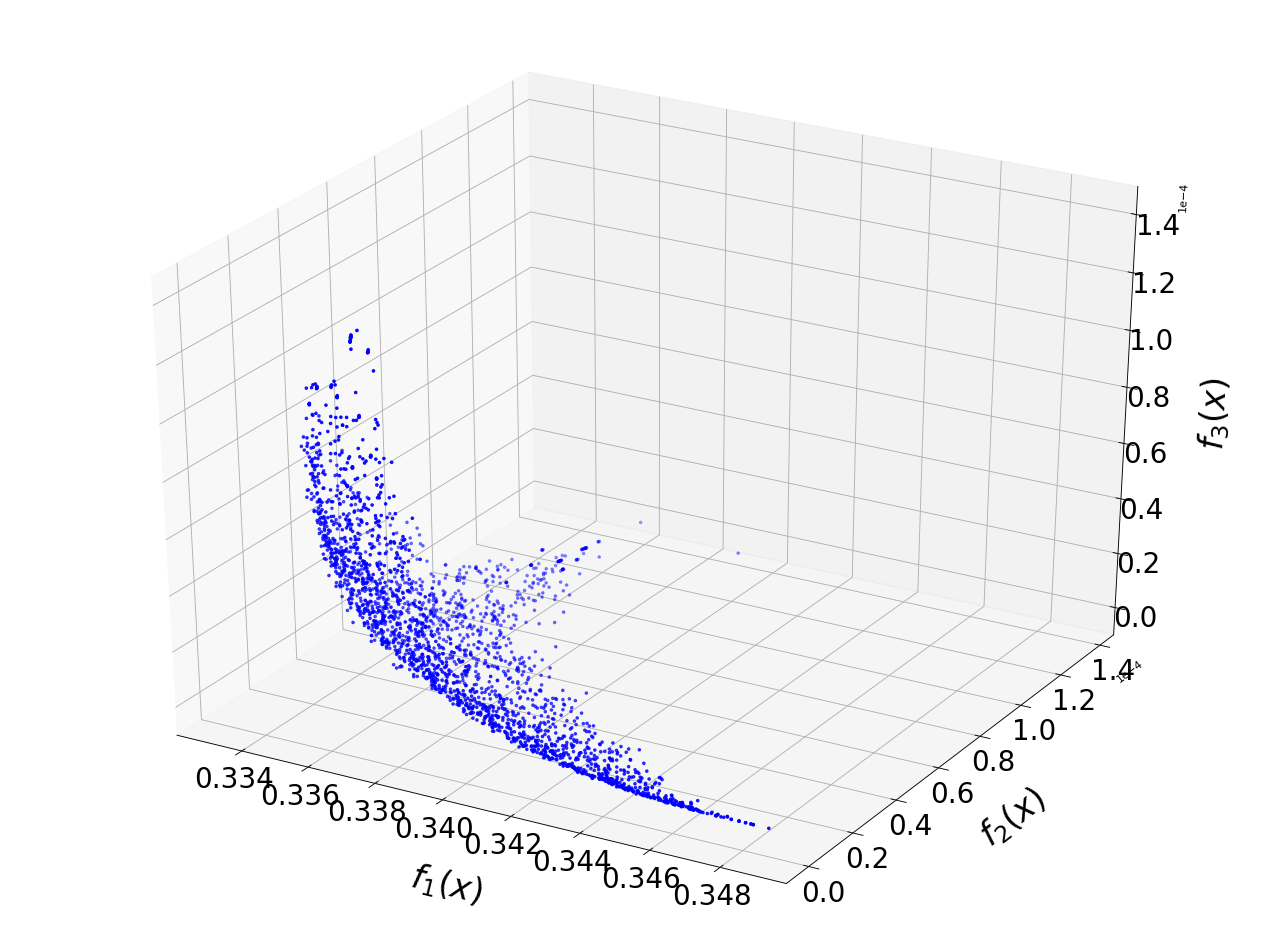

In [32]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection='3d')
# ax.scatter(f1_arrays7[idx_red], f2_arrays7[idx_red], f3_arrays7[idx_red], c='r', marker='.')
# ax.scatter(f1_arrays7[idx_blue], f2_arrays7[idx_blue], f3_arrays7[idx_blue], c='b', marker='.')
# ax.scatter(f1_arrays7[idx_green], f2_arrays7[idx_green], f3_arrays7[idx_green], c='g', marker='.')

# ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax.zaxis.set_tick_params(labelsize=25)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.ticklabel_format(style='sci', axis='z', scilimits=(0,0), useMathText=True)

ax.set_xlabel('\n$f_1(x)$', fontsize = 30, linespacing=3)
ax.set_ylabel('\n$f_2(x)$', fontsize = 30, linespacing=3)
ax.set_zlabel('\n$f_3(x)$', fontsize = 30, linespacing=3)
# ax.zaxis.set_major_locator(LinearLocator(10))

ax.scatter(f1_arrays7, f3_arrays7, f2_arrays7, c='b', marker='.')
plt.tight_layout()
plt.show()

# figure_path = "figs/COMPAS_threeObj_EODI.pdf"
# fig.savefig(figure_path, bbox_inches='tight')

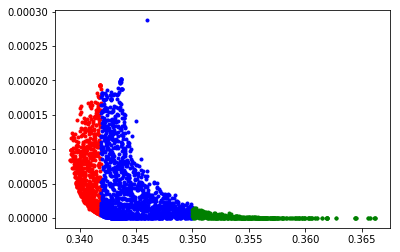

In [48]:

# idx_red = np.where(f3_arrays7 < (np.max(f3_arrays7) - np.min(f3_arrays7))*1.0/10 + np.min(f3_arrays7))
# idx_blue = np.where((f3_arrays7 >= (np.max(f3_arrays7) - np.min(f3_arrays7))*1.0/10 + np.min(f3_arrays7)) \
#                     & (f3_arrays7 < (np.max(f3_arrays7) - np.min(f3_arrays7))*4.0/10 + np.min(f3_arrays7)))
# idx_green = np.where(f3_arrays7 >= (np.max(f3_arrays7) - np.min(f3_arrays7))*4.0/10 + np.min(f3_arrays7))

plt.plot(f1_arrays7[idx_red], f2_arrays7[idx_red],  'r.') #color=colors   low DI
plt.plot(f1_arrays7[idx_blue], f2_arrays7[idx_blue],  'b.') #color=colors  middle DI
plt.plot(f1_arrays7[idx_green], f2_arrays7[idx_green],  'g.') #color=colors high DI

# plt.xlim(min(f2_arrays7), max(f2_arrays7))
# plt.ylim(min(f3_arrays7), max(f3_arrays7))
plt.show()

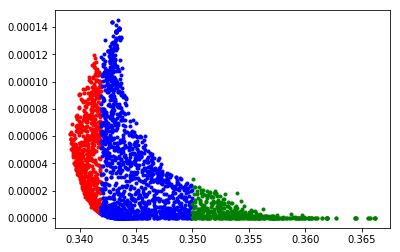

In [49]:

# idx_red = np.where(f2_arrays7 < (np.max(f2_arrays7) - np.min(f2_arrays7))*1.0/10 + np.min(f2_arrays7))
# idx_blue = np.where((f2_arrays7 >= (np.max(f2_arrays7) - np.min(f2_arrays7))*1.0/10 + np.min(f2_arrays7)) \
#                     & (f2_arrays7 < (np.max(f2_arrays7) - np.min(f2_arrays7))*4.0/10 + np.min(f2_arrays7)))
# idx_green = np.where(f2_arrays7 >= (np.max(f2_arrays7) - np.min(f2_arrays7))*4.0/10 + np.min(f2_arrays7))

plt.plot(f1_arrays7[idx_red], f3_arrays7[idx_red],  'r.') #color=colors   low FNR
plt.plot(f1_arrays7[idx_blue], f3_arrays7[idx_blue],  'b.') #color=colors  middle FNR
plt.plot(f1_arrays7[idx_green], f3_arrays7[idx_green],  'g.') #color=colors high FNR

# plt.xlim(min(f2_arrays7), max(f2_arrays7)) 
# plt.ylim(min(f3_arrays7), max(f3_arrays7))
plt.show()

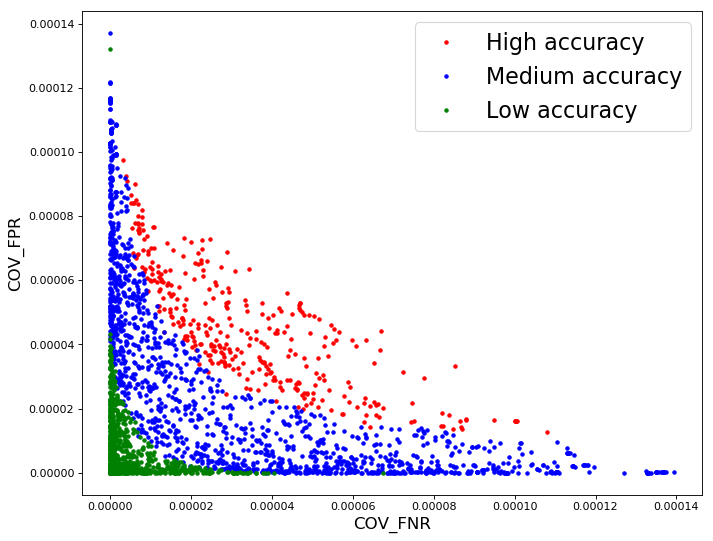

In [33]:

idx_red = np.where(f1_arrays7 < (np.max(f1_arrays7) - np.min(f1_arrays7))*1.0/10 + np.min(f1_arrays7))
idx_blue = np.where((f1_arrays7 >= (np.max(f1_arrays7) - np.min(f1_arrays7))*1.0/10 + np.min(f1_arrays7)) \
                    & (f1_arrays7 < (np.max(f1_arrays7) - np.min(f1_arrays7))*4.0/10 + np.min(f1_arrays7)))
idx_green = np.where(f1_arrays7 >= (np.max(f1_arrays7) - np.min(f1_arrays7))*4.0/10 + np.min(f1_arrays7))

fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax3 = plt.subplot(1, 1, 1)
ax3.plot(f2_arrays7[idx_red], f3_arrays7[idx_red],  'r.', label = "High accuracy") #color=colors   low loss
ax3.plot(f2_arrays7[idx_blue], f3_arrays7[idx_blue],  'b.', label = "Medium accuracy") #color=colors  middle loss
ax3.plot(f2_arrays7[idx_green], f3_arrays7[idx_green],  'g.', label = "Low accuracy") #color=colors high loss
ax3.legend(fontsize = 20)

# plt.xlim(min(f2_arrays7), max(f2_arrays7))
# plt.ylim(min(f3_arrays7), max(f3_arrays7))
ax3.set_xlabel('COV_FNR', fontsize=15)
ax3.set_ylabel('COV_FPR', fontsize=15)
plt.show()
# figure_path = "figs/Adult/Adult_threeObj_FNRFPR.png"
# fig.savefig(figure_path, bbox_inches='tight')

In [34]:
## pick a number of points from Pareto front and compute accuracy, TPR, FPR, D.I., etc. 
M = max(1500, len(f1_arrays7)) 
CV_FPR, CV_FNR, CV_Score, percentage, pvalue, total_accuracy, training_accuracy, training_FPR, training_FNR, \
training_loss, training_obj1, training_obj2, training_obj3 \
= prob.compute_accuracy(f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7, M)


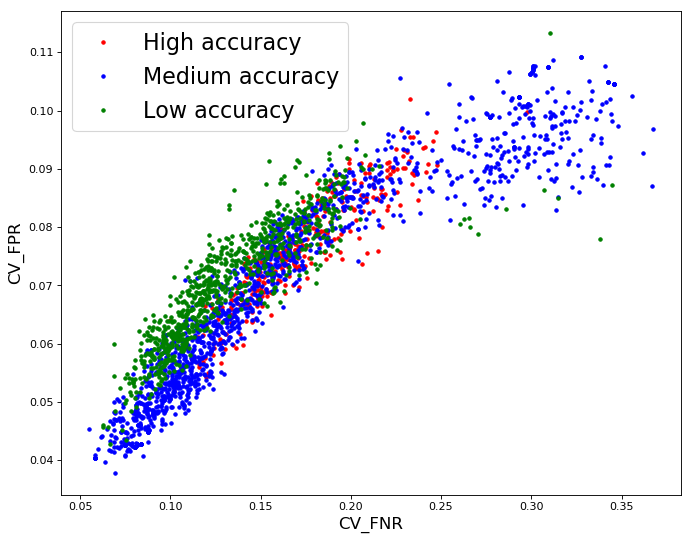

In [35]:
idx_red = np.where(training_loss < (np.max(training_loss) - np.min(training_loss))*1.0/10 + np.min(training_loss))
idx_blue = np.where((training_loss >= (np.max(training_loss) - np.min(training_loss))*1.0/10 + np.min(training_loss)) \
                    & (training_loss < (np.max(training_loss) - np.min(training_loss))*4.0/10 + np.min(training_loss)))
idx_green = np.where(training_loss >= (np.max(training_loss) - np.min(training_loss))*4.0/10 + np.min(training_loss))

fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax3 = plt.subplot(1, 1, 1)
ax3.plot(CV_FNR[idx_red], CV_FPR[idx_red],  'r.', label = "High accuracy") #color=colors   low loss
ax3.plot(CV_FNR[idx_blue], CV_FPR[idx_blue],  'b.', label = "Medium accuracy") #color=colors  middle loss
ax3.plot(CV_FNR[idx_green], CV_FPR[idx_green],  'g.', label = "Low accuracy") #color=colors high loss
ax3.legend(fontsize = 20)

# plt.xlim(min(f2_arrays7), max(f2_arrays7))
# plt.ylim(min(f3_arrays7), max(f3_arrays7))
ax3.set_xlabel('CV_FNR', fontsize=15)
ax3.set_ylabel('CV_FPR', fontsize=15)
plt.show()
# figure_path = "figs/Adult/Adult_threeObj_FNRFPR.png"
# fig.savefig(figure_path, bbox_inches='tight')

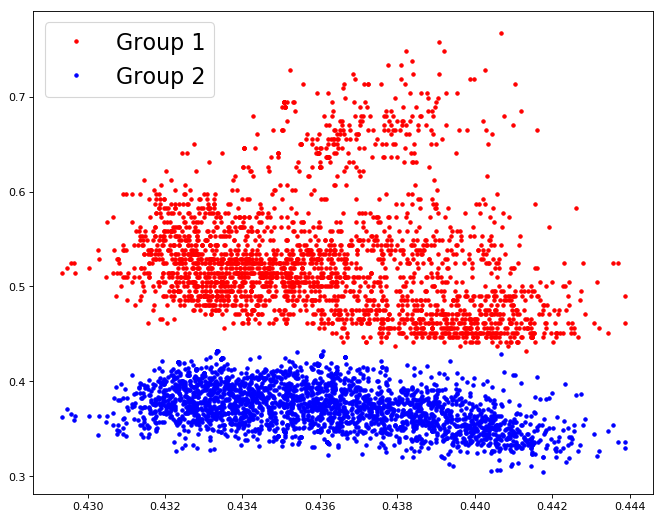

In [41]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax3 = plt.subplot(1, 1, 1)
ax3.plot(training_obj1, training_FNR[:, 0],  'r.', label = "Group 1") #color=colors   low loss
ax3.plot(training_obj1, training_FNR[:, 1],  'b.', label = "Group 2") #color=colors  middle loss
ax3.legend(fontsize = 20)

# fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
# ax3 = plt.subplot(1, 1, 1)
# ax3.plot(training_obj1, training_FPR[:, 0],  'r.', label = "Group 1") #color=colors   low loss
# ax3.plot(training_obj1, training_FPR[:, 1],  'b.', label = "Group 2") #color=colors  middle loss
# ax3.legend(fontsize = 20)

# plt.xlim(min(f2_arrays7), max(f2_arrays7))
# plt.ylim(min(f3_arrays7), max(f3_arrays7))
# ax3.set_xlabel('CV_FNR', fontsize=15)
# ax3.set_ylabel('CV_FPR', fontsize=15)
# figure_path = "figs/Adult/Adult_threeObj_FNRFPR.png"
# fig.savefig(figure_path, bbox_inches='tight')


# fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
# ax3 = plt.subplot(1, 1, 1)

# ax3.plot(training_obj2, CV_FNR,  'r.') #color=colors   low loss
# ax3.set_xlabel('COV_FNR', fontsize=15)
# ax3.set_ylabel('CV_FNR', fontsize=15)

# ax3.plot(training_obj3, CV_FPR,  'b.') #color=colors  middle loss
# ax3.set_xlabel('COV_FPR', fontsize=15)
# ax3.set_ylabel('CV_FPR', fontsize=15)

plt.show()